# Car Evaluation
Raihana Fawaz (1103210102)

**Import library**

In [3]:
!pip install ucimlrepo

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ucimlrepo import fetch_ucirepo

In [13]:
# URL dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data"

# Kolom dataset (sesuai dokumentasi UCI)
column_names = [
    "buying", "maint", "doors", "persons", "lug_boot", "safety", "class"
]

# Muat dataset
car_evaluation = pd.read_csv(url, header=None, names=column_names)

# Tampilkan dataset
print(car_evaluation.head())


  buying  maint doors persons lug_boot safety  class
0  vhigh  vhigh     2       2    small    low  unacc
1  vhigh  vhigh     2       2    small    med  unacc
2  vhigh  vhigh     2       2    small   high  unacc
3  vhigh  vhigh     2       2      med    low  unacc
4  vhigh  vhigh     2       2      med    med  unacc


In [17]:
# Menampilkan tipe data setiap kolom
print("\nTipe Data Kolom:")
print(dataset.dtypes)


Tipe Data Kolom:
buying      object
maint       object
doors       object
persons     object
lug_boot    object
safety      object
class       object
dtype: object


In [19]:
# Cek jumlah total baris duplikat
duplicate_rows = dataset[dataset.duplicated()]

# Tampilkan baris duplikat (jika ada)
print(f"Jumlah baris duplikat: {len(duplicate_rows)}")
if not duplicate_rows.empty:
    print("Baris duplikat:")
    print(duplicate_rows)

# Opsional: Menghapus duplikat (jika diperlukan)
df_no_duplicates = dataset.drop_duplicates()

# Konfirmasi penghapusan duplikat
print(f"Dataset setelah penghapusan duplikat: {df_no_duplicates.shape}")

Jumlah baris duplikat: 0
Dataset setelah penghapusan duplikat: (1728, 7)


In [25]:
# Mengecek Missing Values
print("Cek Missing Values:")
print(dataset.isnull().sum())  # Menampilkan jumlah nilai yang hilang per kolom

# Opsional: Menampilkan semua baris dengan nilai yang hilang
missing_rows = dataset[dataset.isnull().any(axis=1)]
print(f"\nJumlah baris dengan missing values: {len(missing_rows)}")
if not missing_rows.empty:
    print("Baris dengan nilai yang hilang:")
    print(missing_rows)

# Menghapus Missing Values
df_cleaned_rows = dataset.dropna()
print(f"\nDataset setelah menghapus baris dengan missing values: {df_cleaned_rows.shape}")

# Menghapus kolom yang memiliki nilai hilang
df_cleaned_columns = dataset.dropna(axis=1)
print(f"Dataset setelah menghapus kolom dengan missing values: {df_cleaned_columns.shape}")

# Opsional: Mengisi Missing Values
# Contoh: Mengisi nilai hilang dengan nilai rata-rata untuk kolom numerik
df_filled = dataset.fillna(dataset.mean(numeric_only=True))
print("\nDataset setelah mengisi nilai hilang dengan rata-rata:")
print(df_filled)

Cek Missing Values:
buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

Jumlah baris dengan missing values: 0

Dataset setelah menghapus baris dengan missing values: (1728, 7)
Dataset setelah menghapus kolom dengan missing values: (1728, 7)

Dataset setelah mengisi nilai hilang dengan rata-rata:
     buying  maint  doors persons lug_boot safety  class
0     vhigh  vhigh      2       2    small    low  unacc
1     vhigh  vhigh      2       2    small    med  unacc
2     vhigh  vhigh      2       2    small   high  unacc
3     vhigh  vhigh      2       2      med    low  unacc
4     vhigh  vhigh      2       2      med    med  unacc
...     ...    ...    ...     ...      ...    ...    ...
1723    low    low  5more    more      med    med   good
1724    low    low  5more    more      med   high  vgood
1725    low    low  5more    more      big    low  unacc
1726    low    low  5more    more      big    med   good
1727    low    l

**Data Visualization**

<ipython-input-27-15a603be7192>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=dataset, x='class', palette='viridis')  # Ganti 'class' dengan nama kolom target


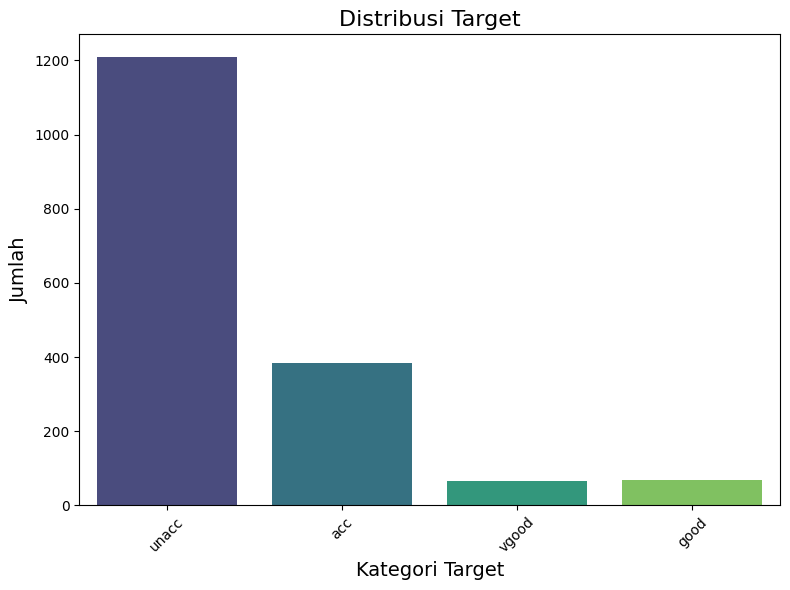

In [27]:
# Plot distribusi target
plt.figure(figsize=(8, 6))
sns.countplot(data=dataset, x='class', palette='viridis')  # Ganti 'class' dengan nama kolom target
plt.title('Distribusi Target', fontsize=16)
plt.xlabel('Kategori Target', fontsize=14)
plt.ylabel('Jumlah', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<ipython-input-28-fb4803f6cb51>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=dataset, x='class', y='safety', palette='viridis')  # Ganti 'class' dan 'safety' sesuai dataset Anda


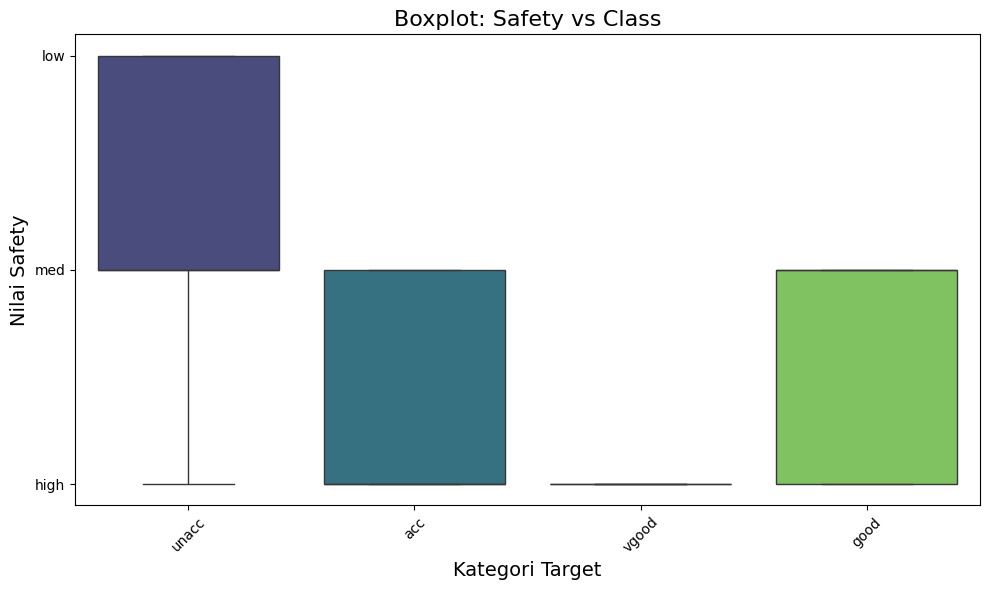

In [28]:
# Boxplot untuk visualisasi distribusi variabel numerik
plt.figure(figsize=(10, 6))
sns.boxplot(data=dataset, x='class', y='safety', palette='viridis')  # Ganti 'class' dan 'safety' sesuai dataset Anda
plt.title('Boxplot: Safety vs Class', fontsize=16)
plt.xlabel('Kategori Target', fontsize=14)
plt.ylabel('Nilai Safety', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [31]:
# Pairplot untuk Hubungan Antar Fitur Numerik
if not X.select_dtypes(include='number').empty:
    sns.pairplot(X.select_dtypes(include='number'))
    plt.show()

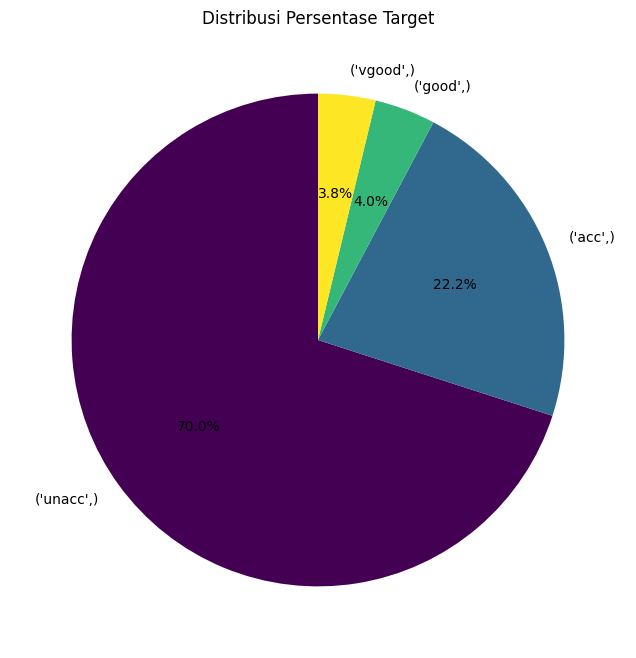

In [35]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

# Pie Chart untuk Distribusi Target
target_counts = y.value_counts()
plt.figure(figsize=(8, 8))
# Removed 'palette' and use 'colors' instead.
# 'viridis' is replaced with a list of colors from the viridis palette.
plt.pie(target_counts, labels=target_counts.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.viridis(np.linspace(0, 1, len(target_counts))))
plt.title("Distribusi Persentase Target")
plt.show()

<ipython-input-37-8b9d3a712047>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_counts.index, y=category_counts.values, palette='viridis')


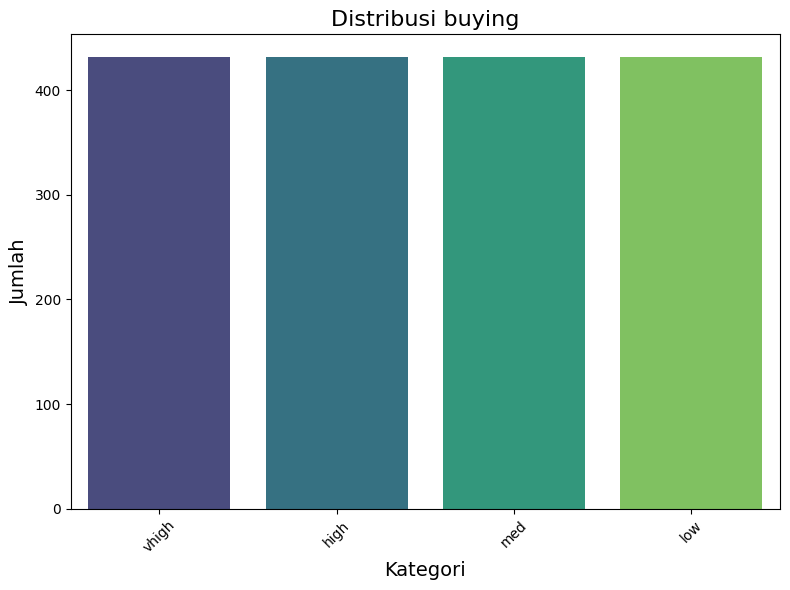

<ipython-input-37-8b9d3a712047>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_counts.index, y=category_counts.values, palette='viridis')


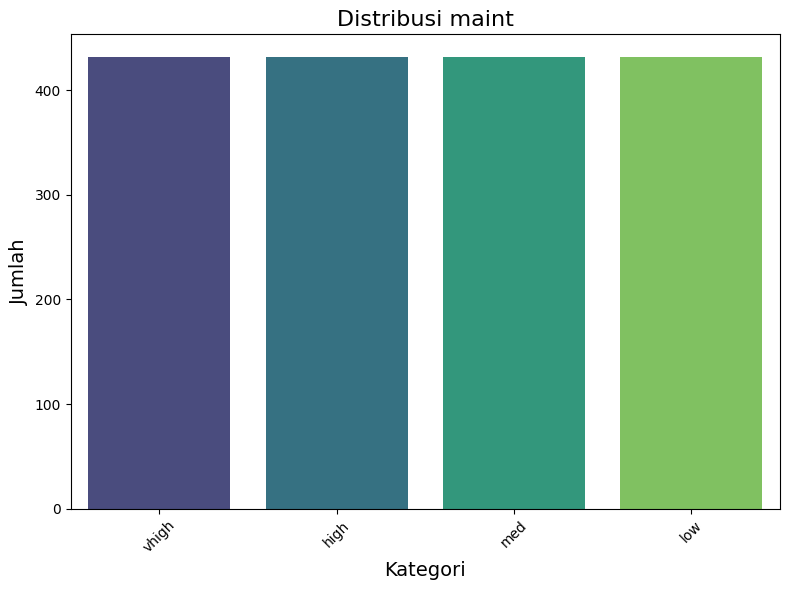

<ipython-input-37-8b9d3a712047>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_counts.index, y=category_counts.values, palette='viridis')


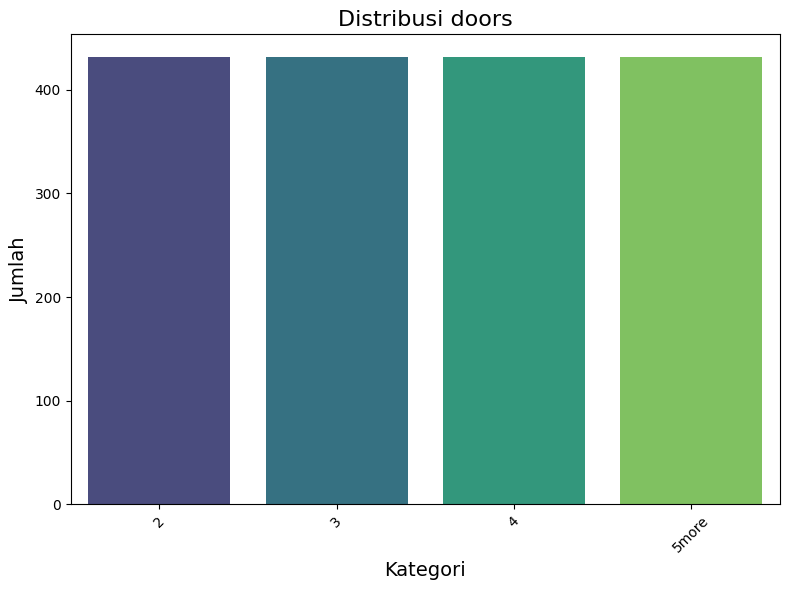

<ipython-input-37-8b9d3a712047>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_counts.index, y=category_counts.values, palette='viridis')


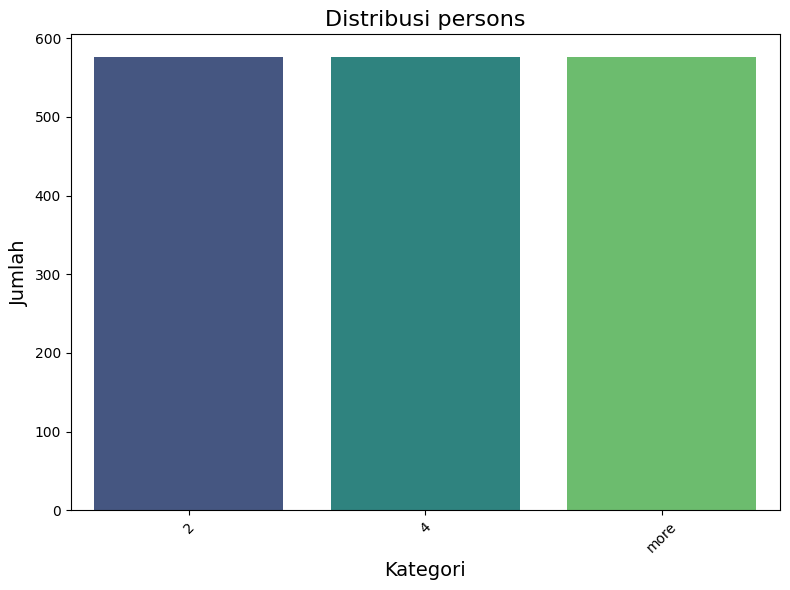

<ipython-input-37-8b9d3a712047>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_counts.index, y=category_counts.values, palette='viridis')


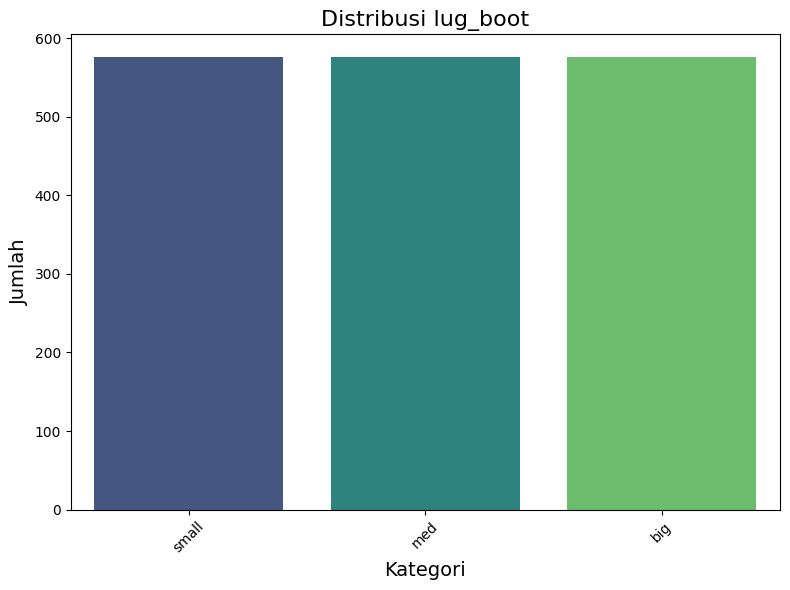

<ipython-input-37-8b9d3a712047>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_counts.index, y=category_counts.values, palette='viridis')


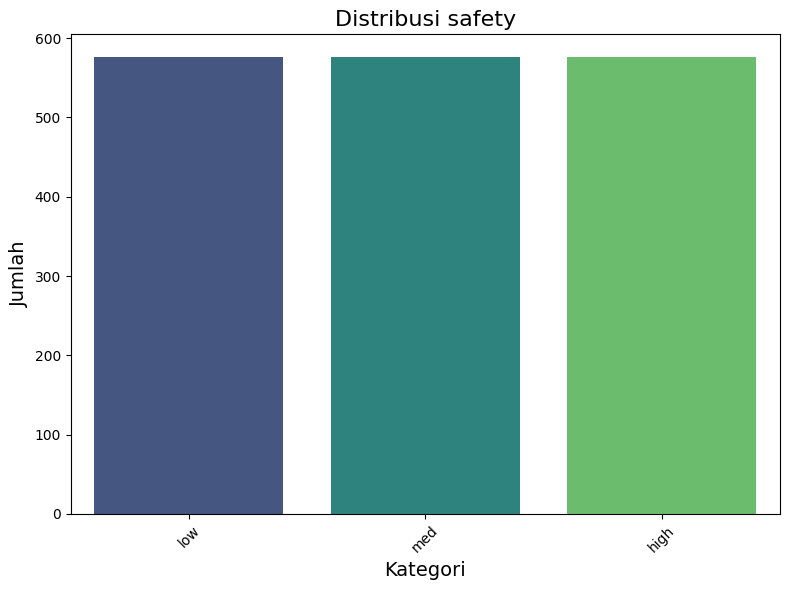

<ipython-input-37-8b9d3a712047>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_counts.index, y=category_counts.values, palette='viridis')


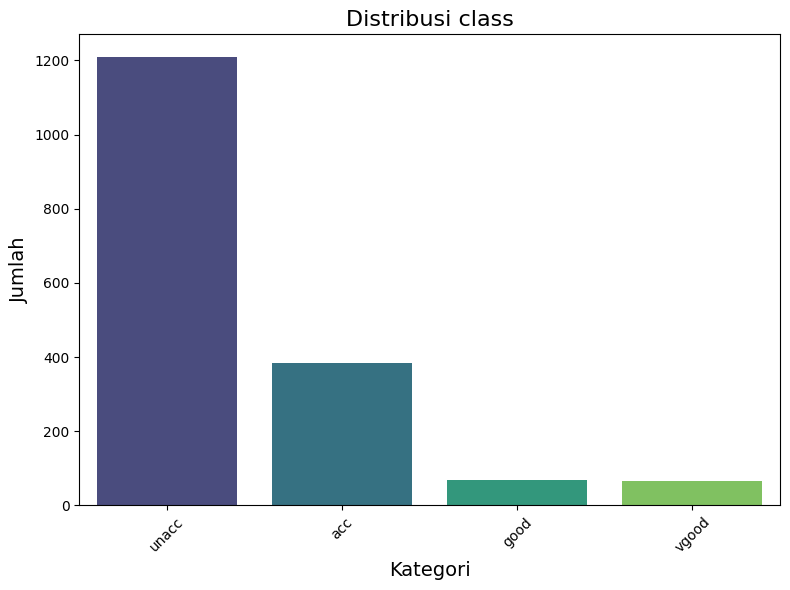

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

# Deteksi kolom kategorikal
categorical_columns = dataset.select_dtypes(include=['object']).columns

# Buat barplot untuk setiap kolom kategorikal
for col in categorical_columns:
    plt.figure(figsize=(8, 6))
    category_counts = dataset[col].value_counts()
    sns.barplot(x=category_counts.index, y=category_counts.values, palette='viridis')
    plt.title(f'Distribusi {col}', fontsize=16)
    plt.xlabel('Kategori', fontsize=14)
    plt.ylabel('Jumlah', fontsize=14)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


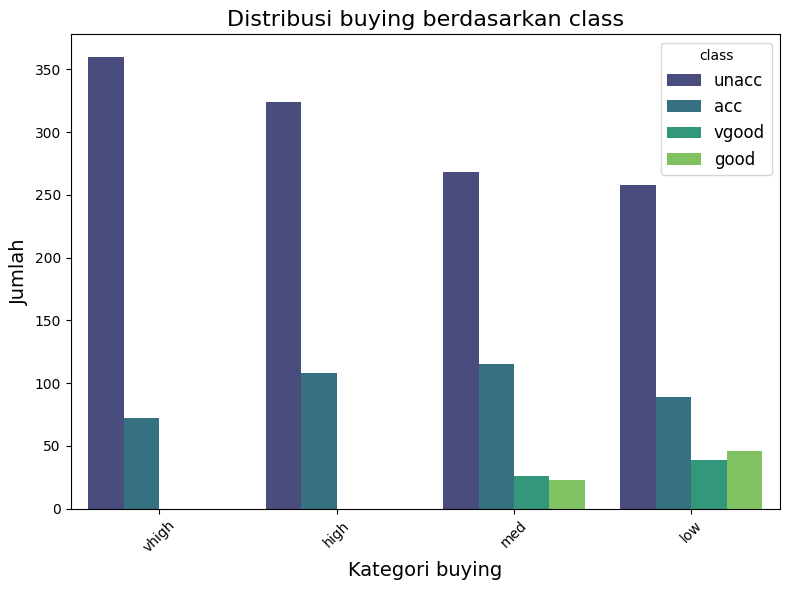

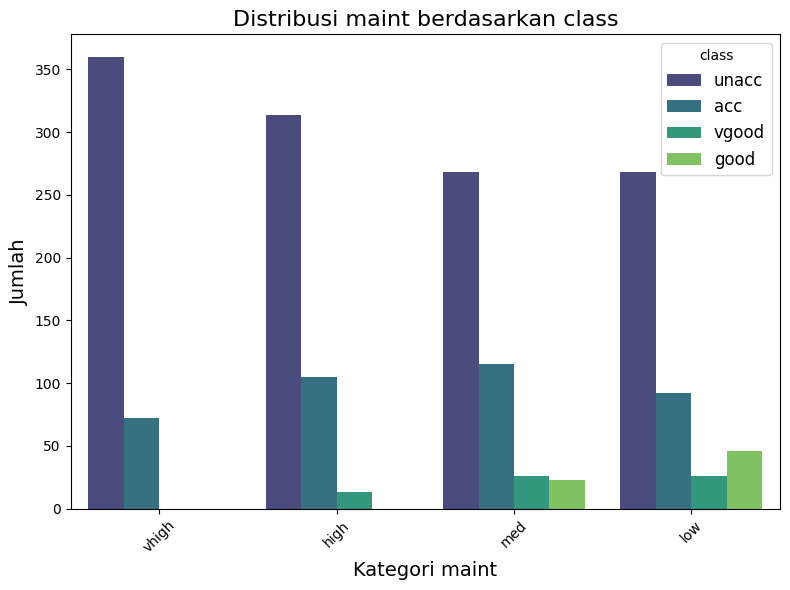

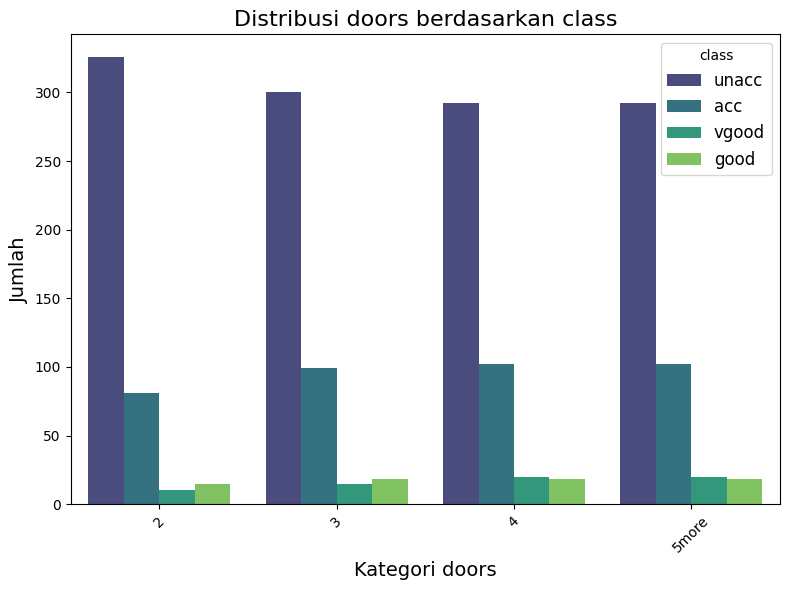

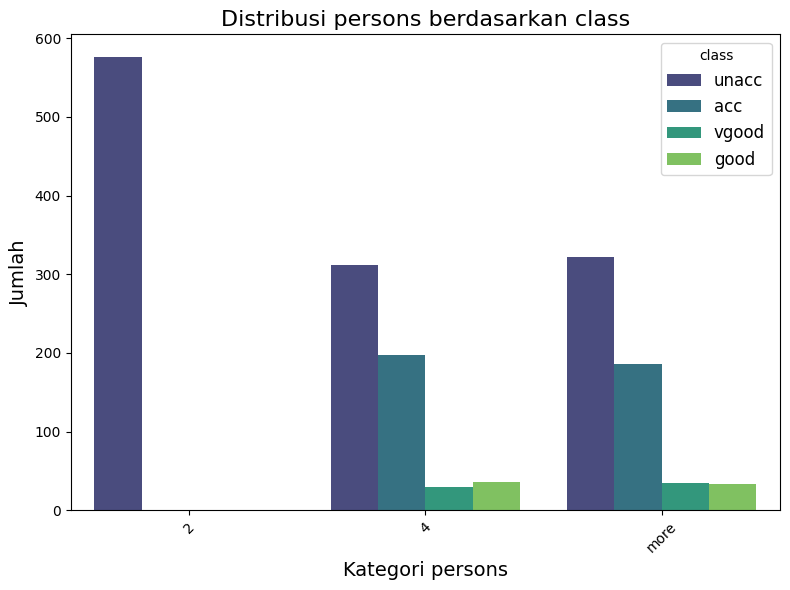

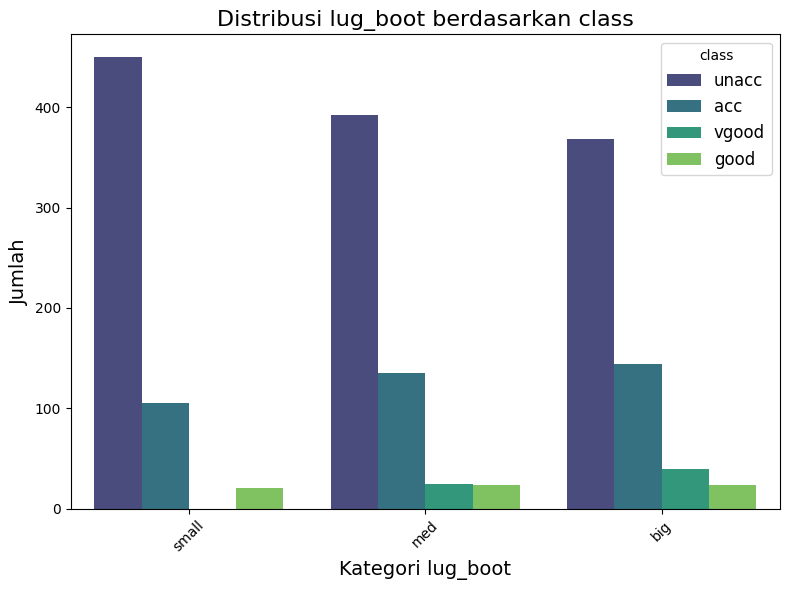

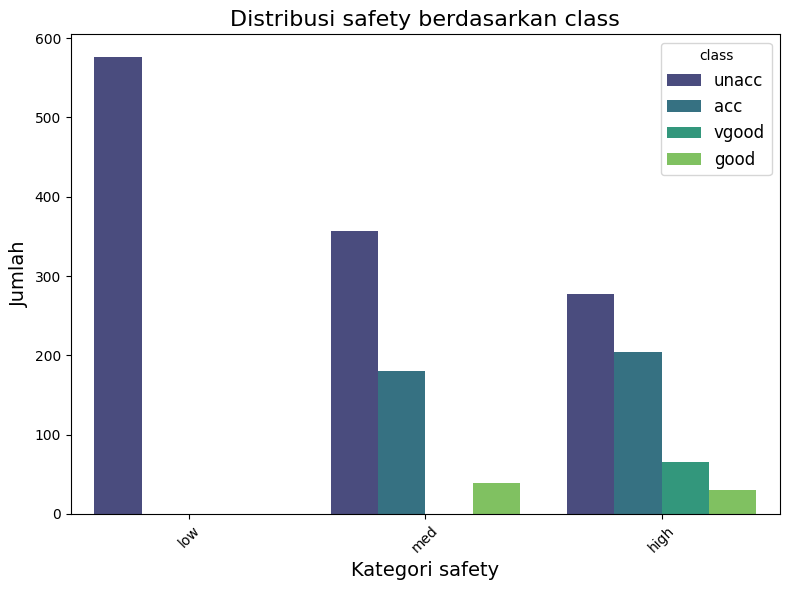

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

# Daftar kolom kategorikal (selain target)
categorical_columns = dataset.select_dtypes(include=['object']).columns
target_column = 'class'  # Ganti 'class' dengan kolom target Anda

# Hapus kolom target dari daftar kolom kategorikal (jika ada)
categorical_columns = [col for col in categorical_columns if col != target_column]

# Buat barplot untuk setiap kolom kategorikal terhadap target
for col in categorical_columns:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=dataset, x=col, hue=target_column, palette='viridis')
    plt.title(f'Distribusi {col} berdasarkan {target_column}', fontsize=16)
    plt.xlabel(f'Kategori {col}', fontsize=14)
    plt.ylabel('Jumlah', fontsize=14)
    plt.xticks(rotation=45)
    plt.legend(title=target_column, loc='upper right', fontsize=12)
    plt.tight_layout()
    plt.show()


# Logistics Regression

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [45]:
# Mengonversi fitur kategorikal menjadi numerik menggunakan One-Hot Encoding
X_encoded = pd.get_dummies(X)

In [46]:
# Memisahkan dataset menjadi fitur (X_encoded) dan target (y)
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

In [47]:
# Membuat pipeline dengan Logistic Regression
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Menstandarisasi fitur
    ('logistic_regression', LogisticRegression(max_iter=1000))  # Model Logistic Regression
])

In [48]:
# Model Logistic Regression
model = LogisticRegression(max_iter=1000, solver='liblinear')  # Tambahkan solver sesuai kebutuhan

# 1. Hyperparameter untuk GridSearchCV
param_grid = {
    'penalty': ['l1', 'l2'],           # Regularisasi
    'C': [0.01, 0.1, 1, 10, 100],     # Inversi regularisasi strength
    'solver': ['liblinear']            # Solver yang mendukung l1 dan l2
}


In [49]:
# GridSearchCV
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Menampilkan hasil terbaik
print("Best parameters (GridSearchCV):", grid_search.best_params_)
print("Best score (GridSearchCV):", grid_search.best_score_)

# Evaluasi pada test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
print("Accuracy on test set (GridSearchCV):", accuracy_score(y_test, y_pred))

Fitting 5 folds for each of 10 candidates, totalling 50 fits


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Best parameters (GridSearchCV): {'C': 100, 'penalty': 'l1', 'solver': 'liblinear'}
Best score (GridSearchCV): 0.8972453304033904
Accuracy on test set (GridSearchCV): 0.8988439306358381


In [50]:
print("\nClassification Report:")
report = classification_report(y_test, y_pred, output_dict=True)
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

         acc       0.82      0.76      0.79        83
        good       0.36      0.45      0.40        11
       unacc       0.95      0.97      0.96       235
       vgood       0.94      0.88      0.91        17

    accuracy                           0.90       346
   macro avg       0.77      0.77      0.76       346
weighted avg       0.90      0.90      0.90       346



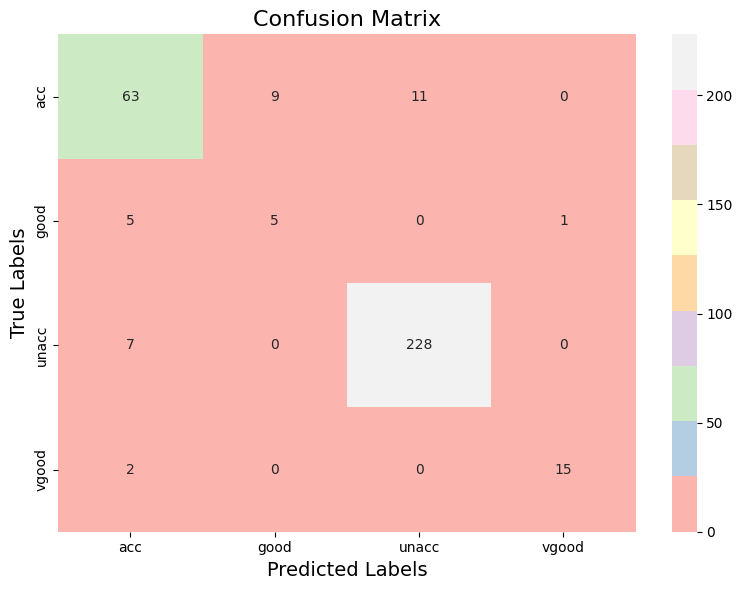

In [54]:
# Buat Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
labels = best_model.classes_  # Ambil label kelas dari model

# Plot Confusion Matrix dengan Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Pastel1', xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix', fontsize=16)
plt.xlabel('Predicted Labels', fontsize=14)
plt.ylabel('True Labels', fontsize=14)
plt.tight_layout()
plt.show()


In [60]:
from sklearn.preprocessing import label_binarize

# Pastikan target multiclass diubah ke format binarized
y_true = label_binarize(y_test, classes=best_model.classes_)
y_score = best_model.predict_proba(X_test)  # Probabilitas prediksi untuk semua kelas

print("Shape y_true:", y_true.shape)
print("Shape y_score:", y_score.shape)


Shape y_true: (346, 4)
Shape y_score: (346, 4)


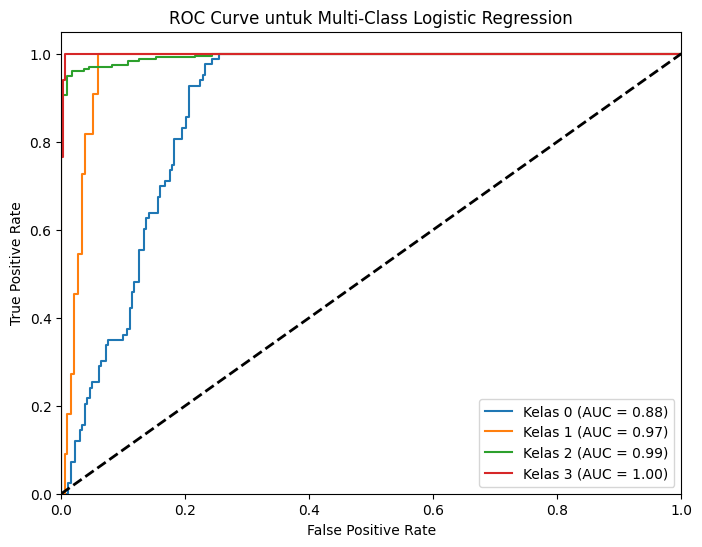

In [73]:
# Binarize y_test untuk multi-class ROC
y_binarized = label_binarize(y_test, classes=np.unique(y))
n_classes = y_binarized.shape[1]

# Menghitung ROC Curve dan AUC untuk setiap kelas
fpr = {}
tpr = {}
roc_auc = {}

y_score = best_model.decision_function(X_test)  # Menggunakan decision_function untuk mendapatkan probabilitas

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_binarized[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC Curve untuk setiap kelas
plt.figure(figsize=(8, 6))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'Kelas {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve untuk Multi-Class Logistic Regression')
plt.legend(loc='lower right')
plt.show()

# Decision Tree

In [74]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [75]:
X_encoded = pd.get_dummies(X)  # Mengonversi fitur kategorikal menjadi numerik menggunakan One-Hot Encoding

In [76]:
# Memisahkan dataset menjadi fitur (X_encoded) dan target (y)
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

In [79]:
# Membuat pipeline dengan Decision Tree Classifier
pipeline = Pipeline([
    ('decision_tree', DecisionTreeClassifier())  # Model Decision Tree Classifier
])

# Hyperparameter untuk GridSearchCV
param_grid = {
    'decision_tree__criterion': ['gini', 'entropy', 'log_loss'],          # Fungsi impurity
    'decision_tree__max_depth': [None, 5, 10, 20, 30],                   # Kedalaman maksimum
    'decision_tree__min_samples_split': [2, 5, 10],                      # Minimum sampel untuk split
    'decision_tree__min_samples_leaf': [1, 2, 4],                        # Minimum sampel di leaf node
    'decision_tree__max_features': [None, 'sqrt', 'log2']                # Jumlah fitur yang dipilih
}

# Initialize GridSearchCV with the pipeline
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

# Fit the model
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 405 candidates, totalling 2025 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('decision_tree',
                                        DecisionTreeClassifier())]),
             n_jobs=-1,
             param_grid={'decision_tree__criterion': ['gini', 'entropy',
                                                      'log_loss'],
                         'decision_tree__max_depth': [None, 5, 10, 20, 30],
                         'decision_tree__max_features': [None, 'sqrt', 'log2'],
                         'decision_tree__min_samples_leaf': [1, 2, 4],
                         'decision_tree__min_samples_split': [2, 5, 10]},
             scoring='accuracy', verbose=1)

In [80]:
# Menampilkan hasil terbaik dari GridSearchCV
print("Best parameters (GridSearchCV):", grid_search.best_params_)
print("Best score (GridSearchCV):", grid_search.best_score_)

# Evaluasi pada test set
best_model_grid = grid_search.best_estimator_
y_pred_grid = best_model_grid.predict(X_test)
print("Accuracy on test set (GridSearchCV):", accuracy_score(y_test, y_pred_grid))

Best parameters (GridSearchCV): {'decision_tree__criterion': 'log_loss', 'decision_tree__max_depth': None, 'decision_tree__max_features': None, 'decision_tree__min_samples_leaf': 1, 'decision_tree__min_samples_split': 2}
Best score (GridSearchCV): 0.9674253126144509
Accuracy on test set (GridSearchCV): 0.9653179190751445


In [81]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

         acc       0.82      0.76      0.79        83
        good       0.36      0.45      0.40        11
       unacc       0.95      0.97      0.96       235
       vgood       0.94      0.88      0.91        17

    accuracy                           0.90       346
   macro avg       0.77      0.77      0.76       346
weighted avg       0.90      0.90      0.90       346



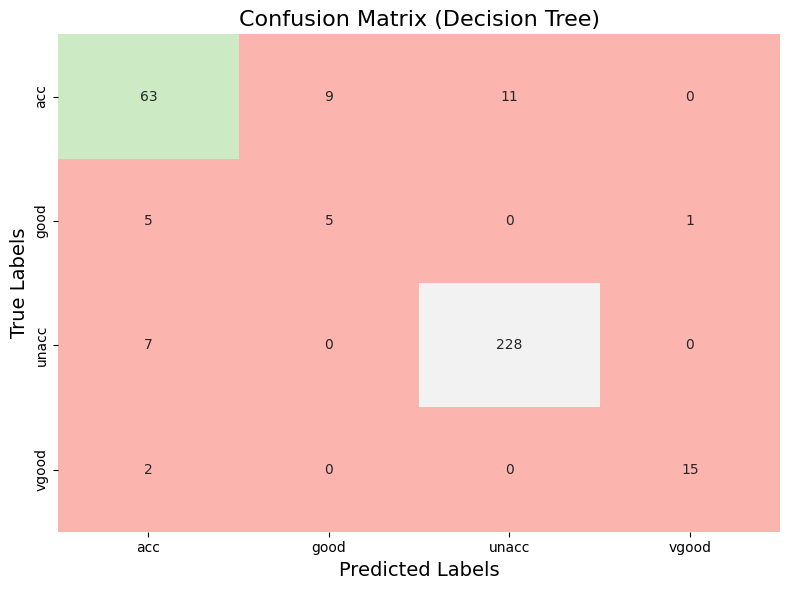

In [82]:
# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Pastel1', xticklabels=labels, yticklabels=labels, cbar=False)
plt.title('Confusion Matrix (Decision Tree)', fontsize=16)
plt.xlabel('Predicted Labels', fontsize=14)
plt.ylabel('True Labels', fontsize=14)
plt.tight_layout()
plt.show()

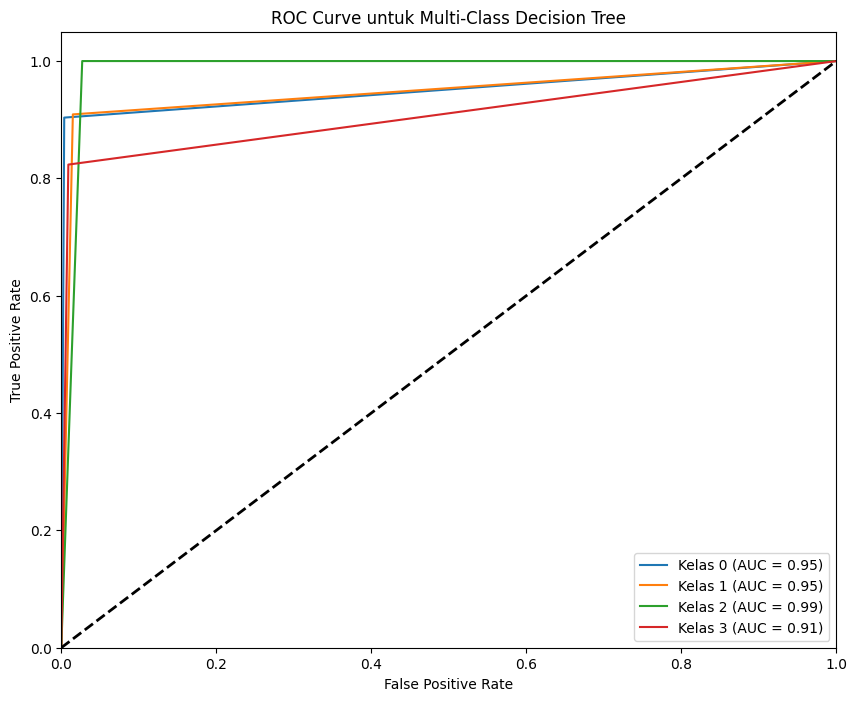

In [89]:
# Binarize y_test untuk multi-class ROC
y_binarized = label_binarize(y_test, classes=np.unique(y))
n_classes = y_binarized.shape[1]

# Menghitung ROC Curve dan AUC untuk setiap kelas
fpr = {}
tpr = {}
roc_auc = {}

# Assuming grid_search is your GridSearchCV object from the previous cell
best_model = grid_search.best_estimator_

# Now you can access predict_proba using the pipeline structure
y_score = best_model.named_steps['decision_tree'].predict_proba(X_test)

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_binarized[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC Curve untuk setiap kelas
plt.figure(figsize=(10, 8))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'Kelas {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve untuk Multi-Class Decision Tree')
plt.legend(loc='lower right')
plt.show()

# K-Nearest Neighbors

In [90]:
# Import library

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, auc
from sklearn.preprocessing import StandardScaler, label_binarize
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [91]:
X_encoded = pd.get_dummies(X)  # Mengonversi fitur kategorikal menjadi numerik menggunakan One-Hot Encoding

In [92]:
# Memisahkan dataset menjadi fitur (X_encoded) dan target (y)
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

In [93]:
# Membuat pipeline dengan k-NN Classifier
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Menstandarisasi fitur
    ('knn', KNeighborsClassifier())  # Model k-NN Classifier
])

In [94]:
# Model KNN
model = KNeighborsClassifier()

# 1. Hyperparameter untuk GridSearchCV
param_grid = {
    'n_neighbors': range(1, 21),         # Jumlah tetangga
    'weights': ['uniform', 'distance'], # Bobot
    'metric': ['euclidean', 'manhattan', 'minkowski']  # Metode perhitungan jarak
}

grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 120 candidates, totalling 600 fits


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': range(1, 21),
                         'weights': ['uniform', 'distance']},
             scoring='accuracy', verbose=1)

In [95]:
# Menampilkan hasil terbaik dari GridSearchCV
print("Best parameters (GridSearchCV):", grid_search.best_params_)
print("Best score (GridSearchCV):", grid_search.best_score_)

# Evaluasi pada test set
best_model_grid = grid_search.best_estimator_
y_pred_grid = best_model_grid.predict(X_test)
print("Accuracy on test set (GridSearchCV):", accuracy_score(y_test, y_pred_grid))

Best parameters (GridSearchCV): {'metric': 'manhattan', 'n_neighbors': 11, 'weights': 'distance'}
Best score (GridSearchCV): 0.9218463872756761
Accuracy on test set (GridSearchCV): 0.9190751445086706


In [96]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

         acc       0.82      0.76      0.79        83
        good       0.36      0.45      0.40        11
       unacc       0.95      0.97      0.96       235
       vgood       0.94      0.88      0.91        17

    accuracy                           0.90       346
   macro avg       0.77      0.77      0.76       346
weighted avg       0.90      0.90      0.90       346



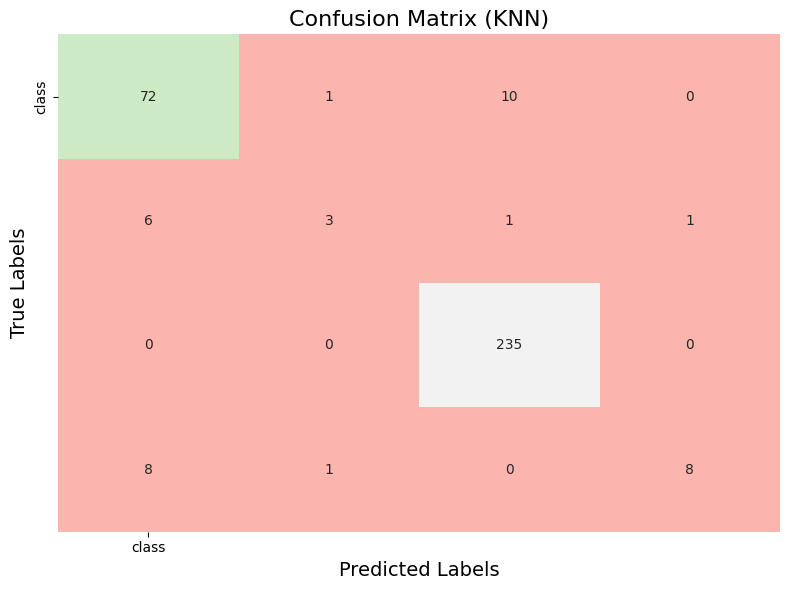

In [97]:
# Prediksi menggunakan model terbaik
y_pred = best_model_grid.predict(X_test)  # Ganti 'best_model_grid' dengan model KNN terbaik Anda

# Buat Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
labels = sorted(set(y_test))  # Mendapatkan label kelas dari y_test

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Pastel1', xticklabels=labels, yticklabels=labels, cbar=False)
plt.title('Confusion Matrix (KNN)', fontsize=16)
plt.xlabel('Predicted Labels', fontsize=14)
plt.ylabel('True Labels', fontsize=14)
plt.tight_layout()
plt.show()

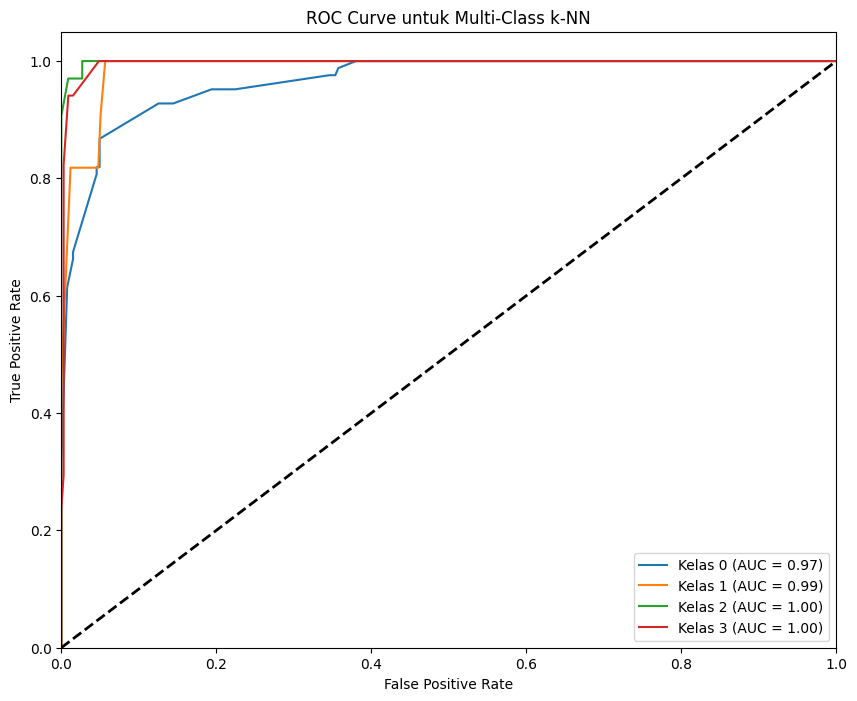

In [99]:
# Binarize y_test untuk multi-class ROC
y_binarized = label_binarize(y_test, classes=np.unique(y))
n_classes = y_binarized.shape[1]

# Menghitung ROC Curve dan AUC untuk setiap kelas
fpr = {}
tpr = {}
roc_auc = {}

# Prediksi menggunakan model terbaik
y_pred = best_model_grid.predict(X_test)  # Ganti 'best_model_grid' dengan model KNN terbaik Anda

# Menggunakan predict_proba untuk mendapatkan probabilitas dari k-NN
y_score = best_model_grid.predict_proba(X_test)

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_binarized[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC Curve untuk setiap kelas
plt.figure(figsize=(10, 8))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'Kelas {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve untuk Multi-Class k-NN')
plt.legend(loc='lower right')
plt.show()

# XGBoost Classification

In [100]:
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, auc, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler, label_binarize, LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [101]:
X_encoded = pd.get_dummies(X)  # Mengonversi fitur kategorikal menjadi numerik menggunakan One-Hot Encoding

In [102]:
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)  # Mengonversi label string ke angka

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [103]:
# Memisahkan dataset menjadi fitur (X_encoded) dan target (y_encoded)
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_encoded, test_size=0.2, random_state=42)

In [104]:
# Membuat pipeline dengan XGBoost Classifier
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Menstandarisasi fitur
    ('xgb', XGBClassifier(use_label_encoder=False, eval_metric='mlogloss'))  # Model XGBoost Classifier
])

In [107]:
# Hyperparameter untuk GridSearchCV
param_grid = {
    'xgb__n_estimators': [50, 100],         # Kurangi pilihan
    'xgb__learning_rate': [0.1, 0.2],       # Pilih nilai yang sering optimal
    'xgb__max_depth': [3, 5],               # Fokus pada kedalaman kecil
    'xgb__subsample': [0.8, 1.0],           # Kurangi variasi subsample
    'xgb__colsample_bytree': [0.8, 1.0],    # Kurangi variasi colsample
    'xgb__gamma': [0, 1],                   # Kurangi opsi gamma
    'xgb__reg_alpha': [0, 0.1],             # Fokus pada nilai kecil
    'xgb__reg_lambda': [1, 1.5]             # Kurangi pilihan lambda
}


# Use the pipeline object instead of 'model'
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 256 candidates, totalling 1280 fits


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:41:52] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('xgb',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      callbacks=None,
                                                      colsample_bylevel=None,
                                                      colsample_bynode=None,
                                                      colsample_bytree=None,
                                                      device=None,
                                                      early_stopping_rounds=None,
                                                      enable_categorical=False,
                                                      eval_metric='mlogloss',
                                                      feature_types=None,
                                                      gamma=None,
                                                      grow_policy=None,
                                                      importance_t...
                                                      multi_strategy=None,
                                                      n_estimators=None,
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      random_state=None, ...))]),
             n_jobs=-1,
             param_grid={'xgb__colsample_bytree': [0.8, 1.0],
                         'xgb__gamma': [0, 1], 'xgb__learning_rate': [0.1, 0.2],
                         'xgb__max_depth': [3, 5],
                         'xgb__n_estimators': [50, 100],
                         'xgb__reg_alpha': [0, 0.1],
                         'xgb__reg_lambda': [1, 1.5],
                         'xgb__subsample': [0.8, 1.0]},
             scoring='accuracy', verbose=1)

In [108]:
# Menampilkan hasil terbaik dari GridSearchCV
print("Best parameters (GridSearchCV):", grid_search.best_params_)
print("Best score (GridSearchCV):", grid_search.best_score_)

# Evaluasi pada test set
best_model_grid = grid_search.best_estimator_
y_pred_grid = best_model_grid.predict(X_test)
print("Accuracy on test set (GridSearchCV):", accuracy_score(y_test, y_pred_grid))


Best parameters (GridSearchCV): {'xgb__colsample_bytree': 1.0, 'xgb__gamma': 0, 'xgb__learning_rate': 0.2, 'xgb__max_depth': 5, 'xgb__n_estimators': 100, 'xgb__reg_alpha': 0, 'xgb__reg_lambda': 1, 'xgb__subsample': 1.0}
Best score (GridSearchCV): 0.9891435148851567
Accuracy on test set (GridSearchCV): 0.976878612716763


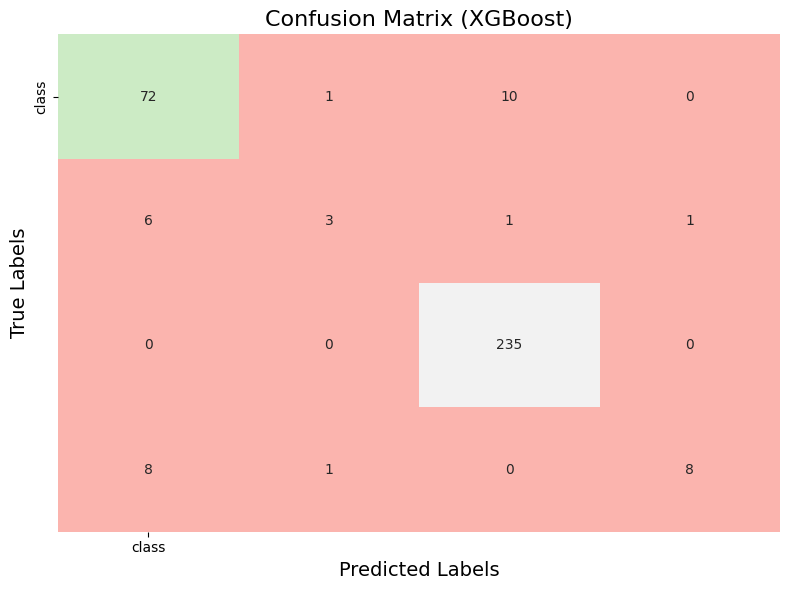

In [113]:
# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Pastel1', xticklabels=labels, yticklabels=labels, cbar=False)
plt.title('Confusion Matrix (XGBoost)', fontsize=16)
plt.xlabel('Predicted Labels', fontsize=14)
plt.ylabel('True Labels', fontsize=14)
plt.tight_layout()
plt.show()

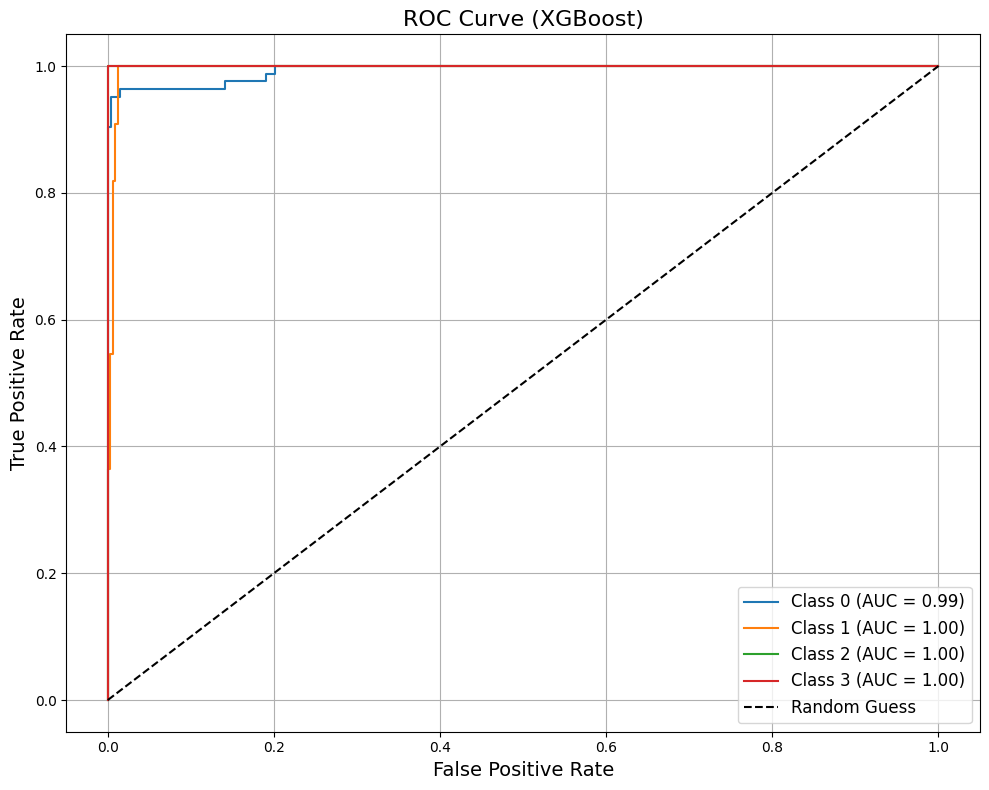

In [118]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import label_binarize

# Binarize target jika multiclass
classes = sorted(set(y_test))  # Mendapatkan kelas unik dari y_test
y_true_binarized = label_binarize(y_test, classes=classes)

# Prediksi probabilitas menggunakan model terbaik
y_score = best_model_grid.predict_proba(X_test)  # Ganti 'best_model_grid' dengan model XGBoost terbaik Anda

# ROC Curve dan AUC untuk setiap kelas
fpr = {}
tpr = {}
roc_auc = {}

for i, class_label in enumerate(classes):
    fpr[i], tpr[i], _ = roc_curve(y_true_binarized[:, i], y_score[:, i])
    roc_auc[i] = roc_auc_score(y_true_binarized[:, i], y_score[:, i])

# Plot ROC Curve untuk setiap kelas
plt.figure(figsize=(10, 8))
for i, class_label in enumerate(classes):
    plt.plot(fpr[i], tpr[i], label=f'Class {class_label} (AUC = {roc_auc[i]:.2f})')

# Garis baseline
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')

# Menambahkan label dan judul
plt.title('ROC Curve (XGBoost)', fontsize=16)
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.legend(loc='lower right', fontsize=12)
plt.grid()
plt.tight_layout() # Changed plt.tight to plt.tight_layout() to fix the AttributeError
plt.show()